<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Deep-Learning/Udacity%20Projects/project1/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [3]:
!git clone https://github.com/udacity/deep-learning.git

fatal: destination path 'deep-learning' already exists and is not an empty directory.


In [4]:
%cd deep-learning/gradient-descent

/content/deep-learning/gradient-descent


## Reading and plotting the data

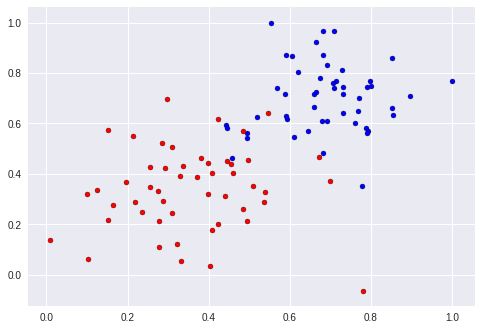

In [5]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learning_rate):
    output = output_formula(x, weights, bias)
    delta_error = -(y - output)
    weights -= learning_rate * delta_error * x
    bias -= learning_rate * delta_error
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [0]:
import sys
np.random.seed(44)
epochs = 100
learning_rate = 0.01

def train(features, targets, epochs, learning_rate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learning_rate)
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        sys.stdout.write(f'\r EPOCHS {e + 1}/{epochs}:-- ')
        if e % (epochs / 10) == 0:
            if last_loss and last_loss < loss:
                print(f'Train loss:- {loss }  WARNING - Loss Increasing', end = '\n')
            else:
                print(f'Train loss:- {loss}', end = '\n')
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print(f'Accuracy:- {accuracy}')
            sys.stdout.flush()
        elif e + 1 == epochs:
          print(f'Train loss:- {loss}', end = '\n')
          predictions = out > 0.5
          accuracy = np.mean(predictions == targets)
          print(f'Accuracy:- {accuracy}')
          sys.stdout.flush()
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

 EPOCHS 1/100:-- Train loss:- 0.7135845195381634
Accuracy:- 0.4
 EPOCHS 11/100:-- Train loss:- 0.6225835210454962
Accuracy:- 0.59
 EPOCHS 21/100:-- Train loss:- 0.5548744083669508
Accuracy:- 0.74
 EPOCHS 31/100:-- Train loss:- 0.501606141872473
Accuracy:- 0.84
 EPOCHS 41/100:-- Train loss:- 0.4593334641861401
Accuracy:- 0.86
 EPOCHS 51/100:-- Train loss:- 0.42525543433469976
Accuracy:- 0.93
 EPOCHS 61/100:-- Train loss:- 0.3973461571671399
Accuracy:- 0.93
 EPOCHS 71/100:-- Train loss:- 0.3741469765239074
Accuracy:- 0.93
 EPOCHS 81/100:-- Train loss:- 0.35459973368161973
Accuracy:- 0.94
 EPOCHS 91/100:-- Train loss:- 0.3379273658879921
Accuracy:- 0.94
 EPOCHS 100/100:-- Train loss:- 0.3248987759028333
Accuracy:- 0.94


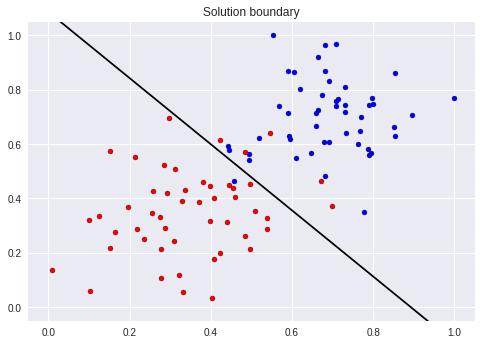

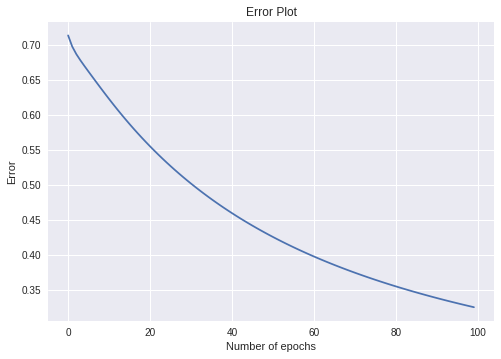

In [17]:
train(X, y, epochs, learning_rate, False)